<a href="https://colab.research.google.com/github/anaidg/gestion_cartera/blob/main/Proyecto_gestion_carteraSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyecto de grado de la especialización en Analítica y Ciencia de Datos:**

#**Gestión de cartera para Aseguradora de Riesgos Laborales (ARL)**
##**Estudiantes:**

*   Ivonne Echeverry Ortega, ivonne.ortega@udea.edu.co
*   Diana Milena Toro Arrieta, diana.toro@udea.edu.co

**Universidad de Antioquia, Medellín, 2021**


**Objetivo General**
Construir un modelo que prediga cuales empresas afiliadas a la ARL tienen mayor probabilidad de quedar en estado de mora el mes siguiente a momento de realizar la consulta, con el fin de que la compañía pueda realizar gestión preventiva con los clientes y reducir el riesgo de no pagos por parte de las empresas afiliadas.





#Data Set
La empresa brinda un data set que consta de 30 variables, incluida el marcador de morosidad, del periodo de tiempo de 2020-01-01 al 2020-06-01, esto con el fin de tener datos pre-pandemia y pandedemia y que el modelo se ajuste lo más posible a la realidad del negocio.

Las variables del data set son:
>*'id'*, identificador de la empresa anonimizado 

>*'Mes_Id'*, identificador año-mes

>*'Uen_Arp_Id'*, identificador(codigo) UEN numerico

>*'Regional_Arp_Id'*, identificador (codigo) de la regional numerico

>*'Oficina_Arp_Id'*, identificador (codigo) de la oficina numerico

>*'Tamano_Empresa_Arp_Id'*, identificador (codigo) del tamaño de numerico

>*'Estado_Empresa_Arp_Id'*, marca- indicador de mora o en cobertura de las empresas

>*'cant_siniestros'*, número de siniestros asociados a un contrato

>*'cant_novedades'*,  numero de novedades asociados a los pagos del mes

>*'Sector_Economico_Id'*, identificador (codigo) del sector economico numerico

>*'clasificacion_riesgo'*, identificador (codigo) para clasificar el nivel de 
riesgo de la actividad economica numerico

>*'Fecha_Inicio_Cobertura'*, fecha en que comenzo cobertura 

>*'ultimo_dia_mes'*, fecha último día del mes, correspondiente al mes_id

>*'Nro_afiliados'*, cantidad de afiliados o trabajadores por empresa

>*'Fecha_Limite_Pago'*, fecha límite de pago asignada a la empresa 

>*'fecha_real_pago'*, fecha en que se realiza el pago por parte de la empresa

>*'avg_Valor_Salario'*, media de los salarios de los trabajadores 

>*'IBC'*, Ingreso Base de Cotización

>*'Numero_Dias_Esperados'*, dias esperados para ser pagados

>*'Numero_Dias_Reportados'*, los días que reporto en el pago

>*'Numero_Total_Coberturas'*, numero de coberturas del contrato

>*'Valor_Cotizacion_Esperada'*, cotización calculada 

>*'Valor_Cotizacion_Reportada'*, cotización reportada 

>*'Valor_Ingreso_Base_Liq_Esp'*, totalizado Ingreso Base liquido esperado

>*'Valor_Ingreso_Base_Liq_Rep'*, totalizado Ingreso Base liquido reportado

>*'Valor_Saldo'*, saldo pendiente en el mes 

>*'Valor_Tasa_Cotizacion_Esp'*, totalizado valor tasa cotización esperado

>*'Valor_Tasa_Cotizacion_Rep'*, totalizado valor tasa cotización esperado

>*'valor_cartera'*, valor del saldo en cartera mes actual

>*'valor_cartera_mes_ant'*, valor del saldo en cartera mes anterior

>*'en_cartera'*, marca si la empresa se encuentra marcada en mora en el modelo de indicadores  




**1. Carga del data set**

> Se toma la decisión de cargar el data set desde un repositorio con custodia de drive, por seguridad de la información.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Librerias**

In [2]:
import datetime
%matplotlib inline
import pandas as pd
import numpy  as np
from numpy import mean
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported fro

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Monografia/dataset_esp.txt', delimiter = "\t")
df.head(5)

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,Estado_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,Fecha_Inicio_Cobertura,ultimo_dia_mes,Nro_afiliados,Fecha_Limite_Pago,fecha_real_pago,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
0,217684039,202002,45,20,21,5347,EN COBERTURA,0,1,431,1,2015/07/07,2020/02/29,1.0,2020/03/17,2020/03/17,877803.0,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0,0.0,0
1,218069202,202006,45,20,21,5347,EN COBERTURA,0,1,235,2,2018/01/26,2020/06/30,1.0,2020/07/02,2020/07/02,1850000.0,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0,0.0,0
2,218446223,202005,16,40,41,5347,EN COBERTURA,0,1,50,3,2019/10/04,2020/05/31,1.0,2020/06/12,2020/06/08,877803.0,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0,0.0,0
3,217758473,202006,34,40,41,5347,EN MORA,0,1,236,5,2016/09/13,2020/06/30,1.0,2020/07/13,2020/07/09,2600000.0,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0,13600.0,1
4,217599766,202004,35,30,31,5347,EN MORA,0,1,236,1,2013/02/21,2020/04/30,1.0,2020/05/08,2020/05/15,1000000.0,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,5300.0,0.0,1


**Información del data set**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057797 entries, 0 to 1057796
Data columns (total 31 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1057797 non-null  int64  
 1   Mes_Id                      1057797 non-null  int64  
 2   Uen_Arp_Id                  1057797 non-null  int64  
 3   Regional_Arp_Id             1057797 non-null  int64  
 4   Oficina_Arp_Id              1057797 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1057797 non-null  int64  
 6   Estado_Empresa_Arp_Id       1057797 non-null  object 
 7   cant_siniestros             1057797 non-null  int64  
 8   cant_novedades              1057797 non-null  int64  
 9   Sector_Economico_Id         1057797 non-null  int64  
 10  clasificacion_riesgo        1057797 non-null  int64  
 11  Fecha_Inicio_Cobertura      1057797 non-null  object 
 12  ultimo_dia_mes              1057797 non-null  object 
 1

**2. Limpieza**

In [ ]:
#busqueda de nulos 
df.isnull().values.any()

False

In [ ]:
#busqueda de registros duplicados 
dupl = df.duplicated()
print(dupl.sum())

0


In [ ]:
# Verificar si existe algún '?' en la columna 'Fecha_Limite_Pago'

ind1= df[df['Fecha_Limite_Pago'] == '?'].index
ind1

Int64Index([], dtype='int64')

In [ ]:
# Verificar si existe algún '?' en la columna 'fecha_real_pago'

ind2 = df[df['fecha_real_pago'] == '?'].index #indica la posición del registro con '?'
print('cantidad de registros con valor ? ='+ str(ind2.value_counts().count()))
ind2

cantidad de registros con valor ? =56545


Int64Index([      9,      11,      14,      42,      56,      83,      92,
                 97,     105,     108,
            ...
            1057634, 1057647, 1057659, 1057662, 1057674, 1057681, 1057691,
            1057734, 1057745, 1057746],
           dtype='int64', length=56545)

In [ ]:
# Eliminar valores "faltantes" en la columna 'fecha_real_pago'(para la línea base).

df.drop(ind2, inplace=True)

In [ ]:
#validamos el borrado de los registros
ind2 = df[df['fecha_real_pago'] == '?'].index #indica la posición del registro con '?'
print('cantidad de registros con valor "?" = '+ str(ind2.value_counts().count()))
ind2

cantidad de registros con valor "?" = 0


Int64Index([], dtype='int64')

Se realiza una reducción de la dimensionalidad, al decidir utilizar el valor de las diferencias de las fechas tanto esperadas y las reales para tener la cantidad de días que se demoro en realizar un pago y las fechas inicio de cobertura y el ultimo dia del mes, que me indica la cantidad de días de vinculación de las empresas, en vez de los campos tipo fecha

adicionalmente, se decide eliminar el campo *estado_empresa_arp_id* dado que como sus valores son indicadores de *MORA* o *EN COBERTURA* lo que puede generar sesgo en los valores de salida del modelo

In [ ]:
list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['Fecha_Inicio_Cobertura']))
list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['ultimo_dia_mes']))
list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['Fecha_Limite_Pago']))
list(map(lambda x: datetime.datetime.strptime(x,'%Y/%m/%d').strftime('%Y-%m-%d'), df['fecha_real_pago']))

df[['Fecha_Inicio_Cobertura','ultimo_dia_mes']] = df[['Fecha_Inicio_Cobertura','ultimo_dia_mes']].apply(pd.to_datetime)
new_col = (df['ultimo_dia_mes'] - df['Fecha_Inicio_Cobertura']).dt.days
df.insert(11, 'cant_dias_cobertura', new_col)

df[['Fecha_Limite_Pago','fecha_real_pago']] = df[['Fecha_Limite_Pago','fecha_real_pago']].apply(pd.to_datetime)
new_col = (df['fecha_real_pago'] - df['Fecha_Limite_Pago']).dt.days
df.insert(13, 'cant_dias_pago', new_col)


df = df.drop('Fecha_Inicio_Cobertura', axis = 1)
df = df.drop('ultimo_dia_mes', axis = 1)
df = df.drop('Fecha_Limite_Pago', axis = 1)
df = df.drop('fecha_real_pago', axis = 1)

df = df.drop('Estado_Empresa_Arp_Id', axis=1)

el nuevo data set 

In [ ]:
df.head(5)

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
0,217684039,202002,45,20,21,5347,0,1,431,1,1698,0,1.0,877803.0,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0,0.0,0
1,218069202,202006,45,20,21,5347,0,1,235,2,886,0,1.0,1850000.0,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0,0.0,0
2,218446223,202005,16,40,41,5347,0,1,50,3,240,-4,1.0,877803.0,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0,0.0,0
3,217758473,202006,34,40,41,5347,0,1,236,5,1386,-4,1.0,2600000.0,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0,13600.0,1
4,217599766,202004,35,30,31,5347,0,1,236,1,2625,7,1.0,1000000.0,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,5300.0,0.0,1


Persistimos el nuevo data set para usarlo desde este paso en caso de ser necesario

In [3]:
#df.to_csv('/content/drive/Shareddrives/Monografia/dataset_limpio.csv') 
df = pd.read_csv('/content/drive/Shareddrives/Monografia/dataset_limpio.csv', delimiter = ",")
df=df.drop('Unnamed: 0', axis=1)
df.head()

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
0,217684039,202002,45,20,21,5347,0,1,431,1,1698,0,1.0,877803.0,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522,0.0,0.0,0
1,218069202,202006,45,20,21,5347,0,1,235,2,886,0,1.0,1850000.0,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522,0.0,0.0,0
2,218446223,202005,16,40,41,5347,0,1,50,3,240,-4,1.0,877803.0,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436,0.0,0.0,0
3,217758473,202006,34,40,41,5347,0,1,236,5,1386,-4,1.0,2600000.0,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522,0.0,13600.0,1
4,217599766,202004,35,30,31,5347,0,1,236,1,2625,7,1.0,1000000.0,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522,5300.0,0.0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001252 entries, 0 to 1001251
Data columns (total 28 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   id                          1001252 non-null  int64  
 1   Mes_Id                      1001252 non-null  int64  
 2   Uen_Arp_Id                  1001252 non-null  int64  
 3   Regional_Arp_Id             1001252 non-null  int64  
 4   Oficina_Arp_Id              1001252 non-null  int64  
 5   Tamano_Empresa_Arp_Id       1001252 non-null  int64  
 6   cant_siniestros             1001252 non-null  int64  
 7   cant_novedades              1001252 non-null  int64  
 8   Sector_Economico_Id         1001252 non-null  int64  
 9   clasificacion_riesgo        1001252 non-null  int64  
 10  cant_dias_cobertura         1001252 non-null  int64  
 11  cant_dias_pago              1001252 non-null  int64  
 12  Nro_afiliados               1001252 non-null  float64
 1

**3. Conociendo los datos**

En este paso buscamos observar las medidas de tendencia central, matriz de correlación  y hacer análisis de temporalidad de las variables para validar si es un problema de clasificación o si hay variables que aporten información al modelo que tengan temporalidad abordar el problema con métodos para series de tiempo y adicional mirar si tenemos un problema con desbalanceo

>Medidas de tendencia central

In [ ]:
df.describe()

,id,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep,valor_cartera,valor_cartera_mes_ant,en_cartera
count,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06,1.001252e+06
mean,2.179925e+08,2.020035e+05,3.938780e+01,3.653640e+01,3.775126e+01,5.346334e+03,1.215558e-01,6.322652e+01,3.327150e+04,2.154709e+00,1.281972e+03,9.925194e+00,4.704437e+04,1.277054e+06,3.743654e+07,2.725197e+01,2.718431e+01,6.341927e+01,1.901134e+06,1.886419e+06,1.060896e+08,1.055060e+08,-1.471546e+04,2.002402e+00,1.931280e+00,2.901446e+04,2.798588e+04,1.825125e-01
std,3.195440e+05,1.709122e+00,1.179618e+01,1.239759e+01,1.268289e+01,1.321357e+00,1.927471e+00,1.506547e+03,9.521186e+04,1.452627e+00,1.318106e+03,4.097474e+01,4.640614e+06,1.295670e+06,5.027258e+08,5.583855e+00,5.953432e+00,1.510666e+03,4.172243e+07,4.174612e+07,3.200896e+09,3.198449e+09,9.285226e+05,2.083863e+00,2.045954e+00,4.362698e+05,4.093521e+05,3.862665e-01
min,2.174568e+08,2.020010e+05,1.000000e+00,2.000000e+01,2.100000e+01,5.343000e+03,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.830000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.657040e+08,5.201907e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.177049e+08,2.020020e+05,3.400000e+01,2.000000e+01,2.100000e+01,5.346000e+03,0.000000e+00,1.000000e+00,1.930000e+02,1.000000e+00,4.350000e+02,-4.000000e+00,1.000000e+00,8.778030e+05,1.024111e+06,2.700000e+01,2.708738e+01,1.000000e+00,9.200000e+03,9.200000e+03,9.540000e+05,8.990000e+05,0.000000e+00,5.220000e-01,5.220000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.179124e+08,2.020030e+05,3.500000e+01,4.000000e+01,4.100000e+01,5.347000e+03,0.000000e+00,3.000000e+00,2.360000e+02,1.000000e+00,9.270000e+02,0.000000e+00,9.000000e+00,8.778030e+05,3.180771e+06,3.000000e+01,3.000000e+01,3.000000e+00,3.980000e+04,3.820000e+04,2.838230e+06,2.664769e+06,0.000000e+00,1.044000e+00,9.396000e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.183063e+08,2.020050e+05,4.500000e+01,4.000000e+01,4.100000e+01,5.347000e+03,0.000000e+00,9.000000e+00,3.410000e+02,3.000000e+00,1.600000e+03,8.000000e+00,8.100000e+01,1.182242e+06,1.075583e+07,3.000000e+01,3.000000e+01,9.000000e+00,1.936000e+05,1.873000e+05,9.855606e+06,9.570122e+06,0.000000e+00,2.436000e+00,2.436000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.185126e+08,2.020060e+05,5.900000e+01,6.000000e+01,6.200000e+01,5.347000e+03,4.860000e+02,3.115760e+05,5.219630e+05,5.000000e+00,9.222000e+03,4.340000e+02,1.546746e+09,8.371905e+07,1.782963e+11,4.500000e+01,9.000000e+01,3.124720e+05,1.194490e+10,1.208371e+10,1.364237e+12,1.364313e+12,2.760416e+08,6.960000e+00,7.733333e+00,1.232977e+08,1.232977e+08,1.000000e+00


>Matriz de correlación

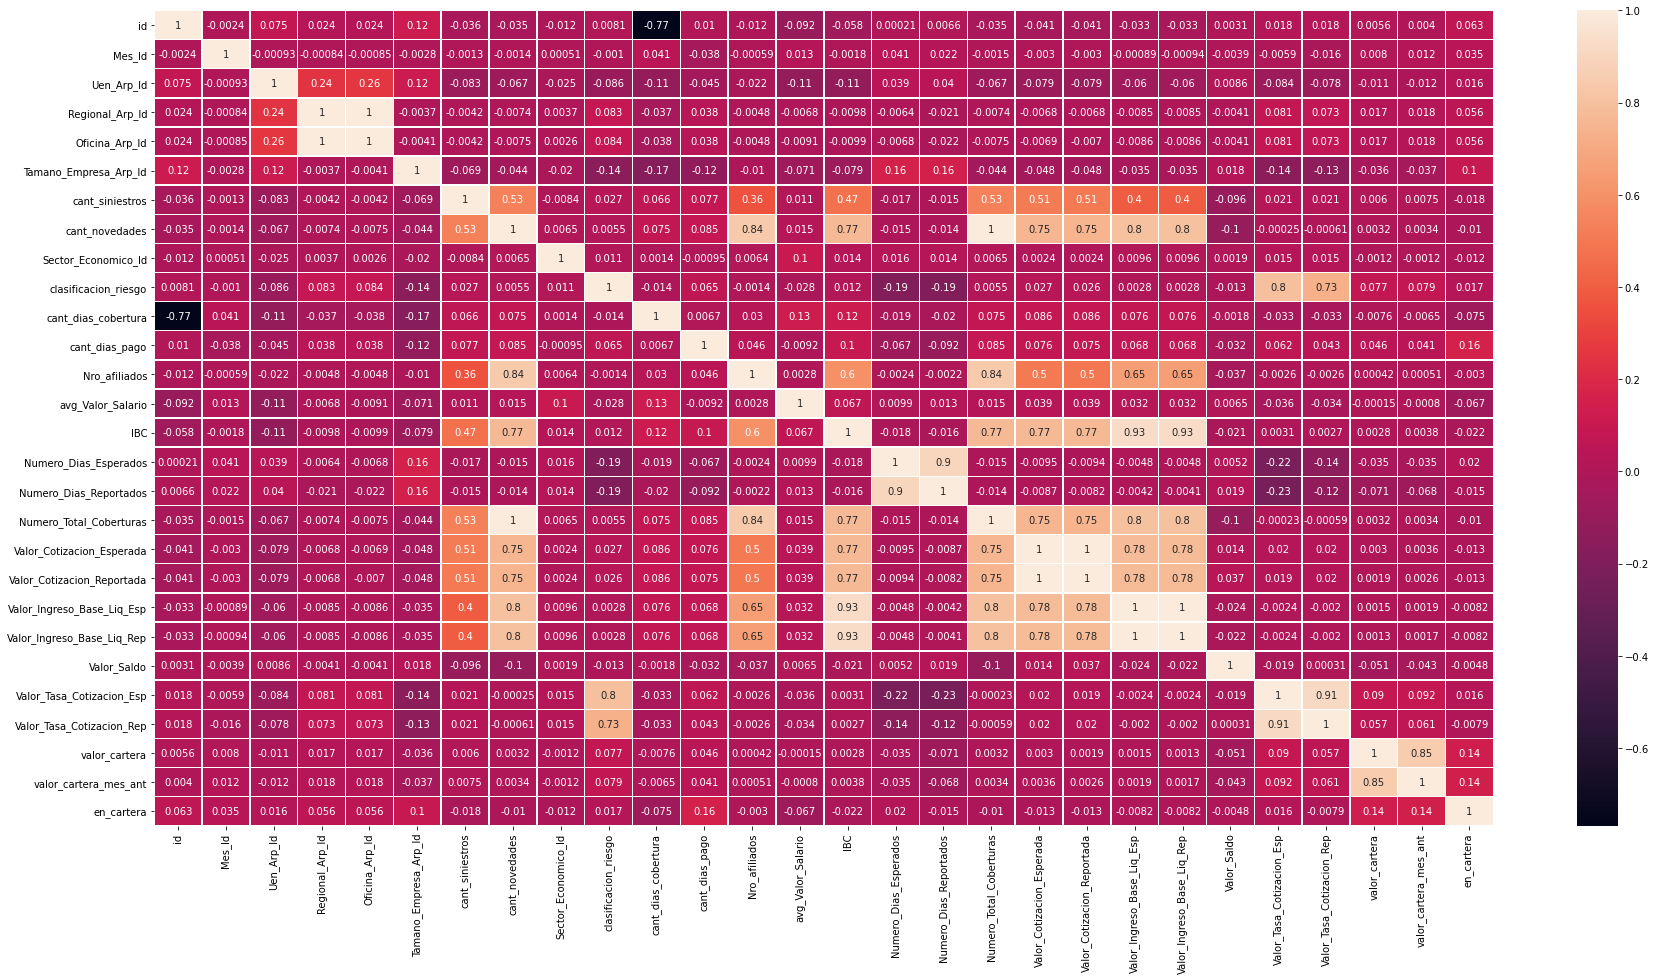

In [ ]:
plt.figure(figsize = (30,15))

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True, linewidths=.5)

>Desbalance del data set

en_cartera
0    818511
1    182741
Name: id, dtype: int64

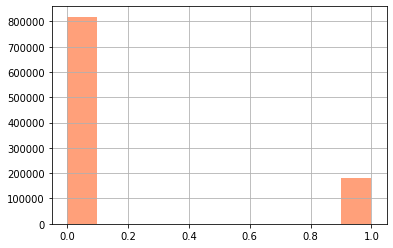

In [4]:
df['en_cartera'].hist(color='#FFA07A')
dg = df.groupby(['en_cartera'])['id'].count() 
dg

>Análisis de temporalidad

Se busca ver si encontramos variables que cambien en el tiempo, definir si es un problema de clasificación o de series de tiempo

Mes_Id
202001    169060
202002    167369
202003    167006
202004    166455
202005    165676
202006    165686
Name: id, dtype: int64

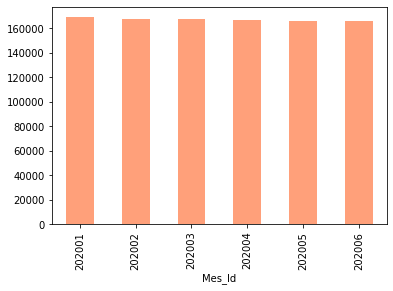

In [6]:
dg = df.groupby(['Mes_Id'])['id'].count()
df.groupby(['Mes_Id'])['id'].count().plot(kind='bar',color='#FFA07A',linestyle='dashed')
dg

validando temporalidad de variables númericas

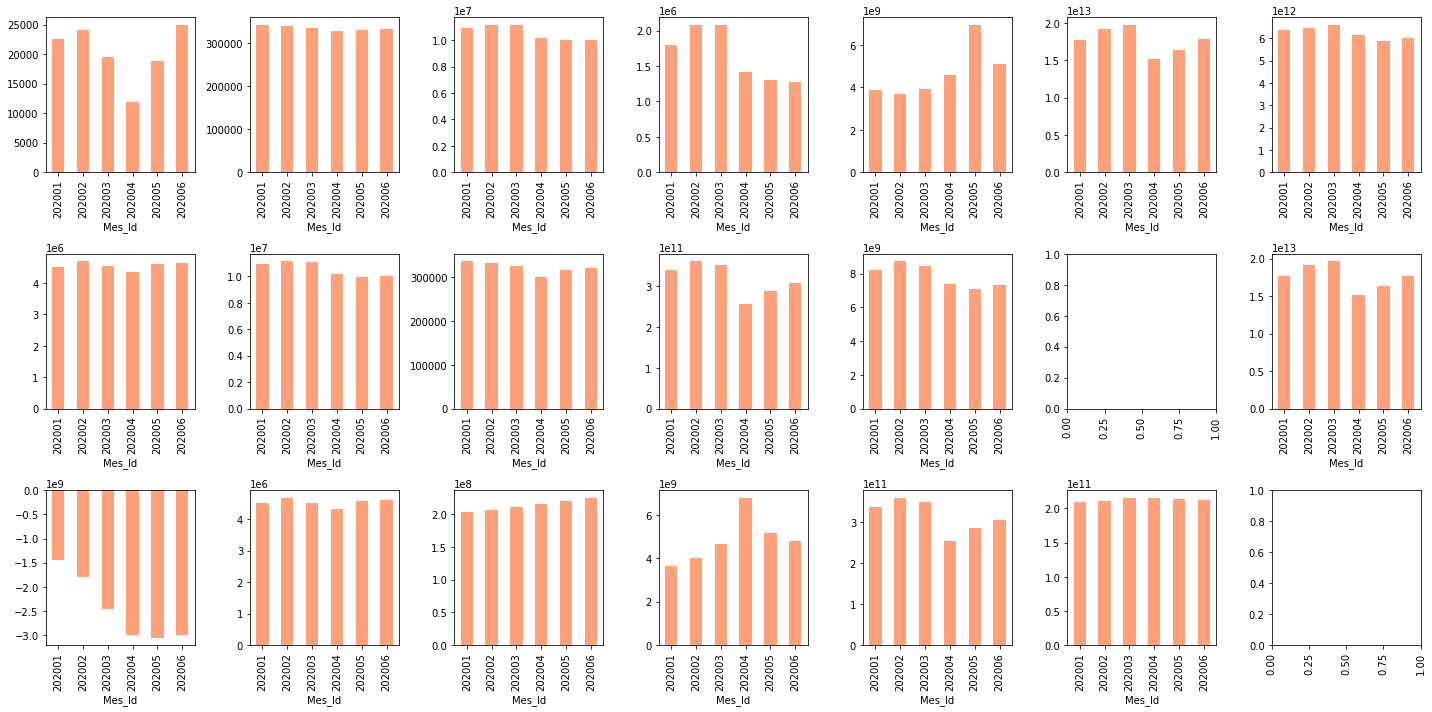

In [30]:
#Build subplot with three rows and two columns
nrows = 3
ncols = 7
fig, axes = plt.subplots(figsize=(20, 10) , nrows = nrows, ncols = ncols)
fig.tight_layout()
columns = ['Uen_Arp_Id', 'Regional_Arp_Id', 'Oficina_Arp_Id',
       'Tamano_Empresa_Arp_Id', 'cant_siniestros']

#five categorical columns and three numerical columns of interest
for i, category in enumerate(['cant_siniestros', 'cant_novedades',
         'cant_dias_cobertura',
       'cant_dias_pago', 'Nro_afiliados', 'avg_Valor_Salario', 'IBC',
       'Numero_Dias_Esperados', 'Numero_Dias_Reportados',
       'Numero_Total_Coberturas', 'Valor_Cotizacion_Esperada',
       'Valor_Cotizacion_Reportada', 'Valor_Ingreso_Base_Liq_Esp',
       'Valor_Ingreso_Base_Liq_Rep', 'Valor_Saldo',
       'Valor_Tasa_Cotizacion_Esp', 'Valor_Tasa_Cotizacion_Rep',
       'valor_cartera', 'valor_cartera_mes_ant']):   
    
    ax = axes[i%nrows][i%ncols]
    df.groupby(['Mes_Id'])[category].sum().plot(kind='bar',color='#FFA07A',linestyle='dashed',ax=ax)
    
  
 
#Rotating xticks for all
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    fig.tight_layout()
    

**4. modelado**

1. separamos el target del data set

In [7]:
X = df.drop(['id','en_cartera','valor_cartera_mes_ant','valor_cartera'],axis=1) #Estas variables solo son diferentes de cero cuando esta en mora ( en_cartera = 1),
                                                                              #y al entrenar modelos con ellas el score es perfecto dado que 
                                                                              #es como entrenar con la variable a predecir, por lo que se toma la decisión sacarlas del dataset
y = df['en_cartera']
X, y

(         Mes_Id  ...  Valor_Tasa_Cotizacion_Rep
 0        202002  ...                      0.522
 1        202006  ...                      0.522
 2        202005  ...                      2.436
 3        202006  ...                      0.522
 4        202004  ...                      0.522
 ...         ...  ...                        ...
 1001247  202004  ...                      2.436
 1001248  202004  ...                      0.522
 1001249  202002  ...                      0.522
 1001250  202002  ...                      0.522
 1001251  202001  ...                      0.522
 
 [1001252 rows x 24 columns], 0          0
 1          0
 2          0
 3          1
 4          1
           ..
 1001247    1
 1001248    0
 1001249    1
 1001250    0
 1001251    0
 Name: en_cartera, Length: 1001252, dtype: int64)

In [8]:
X.head()

,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep
0,202002,45,20,21,5347,0,1,431,1,1698,0,1.0,877803.0,877803,30.0,30.0,1,4600.0,4600.0,877803.0,877803.0,0.0,0.522,0.522
1,202006,45,20,21,5347,0,1,235,2,886,0,1.0,1850000.0,1850000,30.0,30.0,1,19400.0,9700.0,1850000.0,1850000.0,-9700.0,1.044,0.522
2,202005,16,40,41,5347,0,1,50,3,240,-4,1.0,877803.0,877803,30.0,30.0,1,21400.0,21400.0,877803.0,877803.0,0.0,2.436,2.436
3,202006,34,40,41,5347,0,1,236,5,1386,-4,1.0,2600000.0,2600000,30.0,30.0,1,13600.0,13600.0,2600000.0,2600000.0,0.0,0.522,0.522
4,202004,35,30,31,5347,0,1,236,1,2625,7,1.0,1000000.0,1000000,30.0,30.0,1,5300.0,5300.0,1000000.0,1000000.0,0.0,0.522,0.522


In [9]:
X.shape, y.shape

((1001252, 24), (1001252,))

Escalamiento de las variables numericas

Probaremos diferentes metodos de escalamiento y con esto observar si los modelos son sensibles al tipo de escalamiento de las variables

> ***Standar Scaler***

In [10]:
def scalerfunct1(dataframe, columnas):
  SS = StandardScaler()
  scaler = SS.fit(dataframe[columnas].values)
  dataframe[columnas] = scaler.transform(dataframe[columnas].values)
  
  return dataframe

>***MinMax Scaler***

In [11]:
def scalerfunct2(dataframe, columnas):
  MM = MinMaxScaler()
  scaler = MM.fit(dataframe[columnas].values)
  dataframe[columnas] = scaler.transform(dataframe[columnas].values)
  
  return dataframe


>***Robust Scaler***



In [12]:
def scalerfunct3(dataframe, columnas):
  RS = RobustScaler()
  scaler = RS.fit(dataframe[columnas].values)
  dataframe[columnas] = scaler.transform(dataframe[columnas].values)
  
  return dataframe

>***Normalizer***

In [13]:
def scalerfunct4(dataframe, columnas):
  N = Normalizer()
  scaler = N.fit(dataframe[columnas].values)
  dataframe[columnas] = scaler.transform(dataframe[columnas].values)
  
  return dataframe

Variables numericas a las que se les aplica escalamiento

In [14]:
col_names = ['cant_siniestros',
             'cant_novedades', 
             'Nro_afiliados', 
             'avg_Valor_Salario', 
             'IBC', 
             'Numero_Dias_Esperados',
             'Numero_Dias_Reportados', 
             'Numero_Total_Coberturas', 
             'Valor_Cotizacion_Esperada', 
             'Valor_Cotizacion_Reportada', 
             'Valor_Ingreso_Base_Liq_Esp',
             'Valor_Ingreso_Base_Liq_Rep', 
             'Valor_Saldo', 
             'Valor_Tasa_Cotizacion_Esp',
             'Valor_Tasa_Cotizacion_Rep', 
             'cant_dias_pago', 
             'cant_dias_cobertura']

In [15]:
X_n = scalerfunct1(X,col_names)

In [16]:
X_n.head()

,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep
0,202002,45,20,21,5347,-0.063065,-0.041304,431,1,0.315626,-0.242227,-0.010137,-0.308143,-0.072721,0.492139,0.472952,-0.041319,-0.045456,-0.045078,-0.032869,-0.032712,0.015848,-0.710413,-0.688813
1,202006,45,20,21,5347,-0.063065,-0.041304,235,2,-0.300410,-0.242227,-0.010137,0.442200,-0.070787,0.492139,0.472952,-0.041319,-0.045101,-0.044956,-0.032566,-0.032408,0.005402,-0.459916,-0.688813
2,202005,16,40,41,5347,-0.063065,-0.041304,50,3,-0.790507,-0.339848,-0.010137,-0.308143,-0.072721,0.492139,0.472952,-0.041319,-0.045053,-0.044675,-0.032869,-0.032712,0.015848,0.208074,0.246692
3,202006,34,40,41,5347,-0.063065,-0.041304,236,5,0.078923,-0.339848,-0.010137,1.021052,-0.069295,0.492139,0.472952,-0.041319,-0.045240,-0.044862,-0.032331,-0.032174,0.015848,-0.710413,-0.688813
4,202004,35,30,31,5347,-0.063065,-0.041304,236,1,1.018908,-0.071390,-0.010137,-0.213831,-0.072478,0.492139,0.472952,-0.041319,-0.045439,-0.045061,-0.032831,-0.032674,0.015848,-0.710413,-0.688813


2. Dividir el conjunto de datos en entrenamiento y prueba. Como el data set esta desbalanceado se estratifica

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y, test_size=0.3, random_state=0, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0, stratify=y_test)

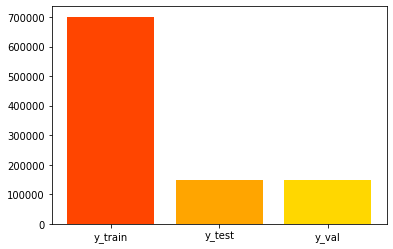

In [44]:
# Distribución de las etiquetas - Aplica sólo para Prueba 2 y 4 (Validación)
u = ['y_train', 'y_test', 'y_val']
v = [y_train.shape[0], y_test.shape[0], y_val.shape[0]]
plt.bar(u, v, color=['#FF4500','#FFA500','#FFD700'])
plt.show()

Se escogen los algoritmos 2 algorimos de clasificación *RandomForestClassifier*, *GradientBoostingClassifier* y el algoritmo de regresión *LGBMClassifier*, con sus hiperparametros por defecto para tener un valor base (*baseline*), para tener un punto de refencia para poder comparar y mejorar los posteriores modelos

In [18]:
clf1 = RandomForestClassifier().fit(X_train, y_train)
clf2 = GradientBoostingClassifier().fit(X_train, y_train)
clf3 = LGBMClassifier().fit(X_train, y_train)

In [122]:
# Se calcula el score de testeo

print(clf1.score(X_test, y_test))
print(clf2.score(X_test, y_test))
print(clf3.score(X_test, y_test))

0.8434229099528591
0.8403800569952327
0.8419514208858231


In [124]:
# Se calcula el score de validación

print(clf1.score(X_val, y_val))
print(clf2.score(X_val, y_val))
print(clf3.score(X_val, y_val))

0.8417783045249954
0.8388353263909234
0.8401936239912643


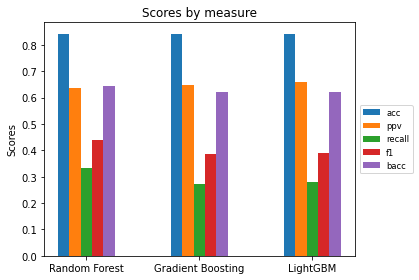

In [125]:
labels = ['Random Forest', 'Gradient Boosting', 'LightGBM']
measures = ['acc','ppv','recall','f1','bacc']
Performance = []
Performance.append([accuracy_score(y_test,clf1.predict(X_test)), accuracy_score(y_test,clf2.predict(X_test)), accuracy_score(y_test,clf3.predict(X_test))])
Performance.append([precision_score(y_test,clf1.predict(X_test)), precision_score(y_test,clf2.predict(X_test)), precision_score(y_test,clf3.predict(X_test))])
Performance.append([recall_score(y_test,clf1.predict(X_test)), recall_score(y_test,clf2.predict(X_test)), recall_score(y_test,clf3.predict(X_test))])
Performance.append([f1_score(y_test,clf1.predict(X_test)), f1_score(y_test,clf2.predict(X_test)), f1_score(y_test,clf3.predict(X_test))])
Performance.append([balanced_accuracy_score(y_test,clf1.predict(X_test)), balanced_accuracy_score(y_test,clf2.predict(X_test)), balanced_accuracy_score(y_test,clf3.predict(X_test))])

x = np.arange(len(labels))*2
width = 0.2

fig, ax = plt.subplots()
for i in range(len(measures)):
    ax.bar(x + i*width + 0.3-0.7, Performance[i], width, label=measures[i])
    
ax.set_ylabel('Scores')
ax.set_title('Scores by measure')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(ncol=1,loc='center right', fontsize='small',bbox_to_anchor=(1.2, 0.5))
fig.tight_layout()
plt.show()

[[0.95706036 0.04293964]
 [0.66557222 0.33442778]]


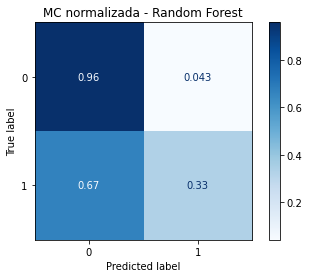

In [126]:
#Matriz de confusión normalizada para Random Forest

disp = plot_confusion_matrix(clf1, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title('MC normalizada - Random Forest')

print(disp.confusion_matrix)

plt.show()

[[0.96689119 0.03310881]
 [0.72627777 0.27372223]]


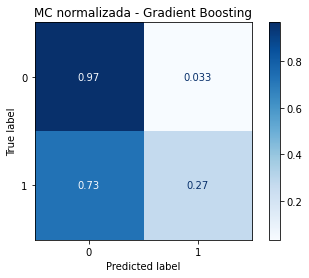

In [127]:
#Matriz de confusión normalizada para Gradient Boosting

disp = plot_confusion_matrix(clf2, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title('MC normalizada - Gradient Boosting')

print(disp.confusion_matrix)

plt.show()

[[0.96689119 0.03310881]
 [0.72627777 0.27372223]]


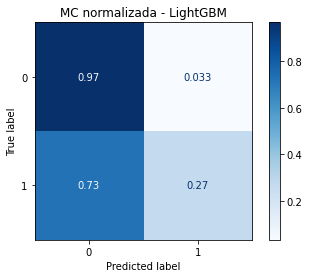

In [128]:
#Matriz de confusión normalizada para LightGBM

disp = plot_confusion_matrix(clf2, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')

disp.ax_.set_title('MC normalizada - LightGBM')

print(disp.confusion_matrix)

plt.show()

Los datos y los modelos probados no evidencian ser sencibles al tipo del escalamiento utilizado, por lo que optaremos en los siguientes experimientos con el metodo del standar scaler cuya clasificación, según las matrices de confusión, fue el que dió el mejor resultado.

In [129]:
clf4 = BaggingClassifier().fit(X_train, y_train) # Bagging with Random Undersampling
clf5 = RandomForestClassifier(n_estimators=10, class_weight='balanced').fit(X_train, y_train) # Random Forest with Class Weighting
clf6 = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample').fit(X_train, y_train) # Random Forest with Bootstrap Class Weighting
#clf7 = BalancedRandomForestClassifier().fit(X_train, y_train) # Random Forest with Random Undersampling
clf8 = EasyEnsembleClassifier(n_estimators=10).fit(X_train, y_train) # Easy Ensemble

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

In [ ]:
print(clf4.score(X_test, y_test))
print(clf5.score(X_test, y_test))
print(clf6.score(X_test, y_test))
#print(clf7.score(X_test, y_test))
print(clf8.score(X_test, y_test))

0.8332489945934429
0.8363184808373505
0.8361253895118118
0.7369430314006445


[[0.95300423 0.04699577]
 [0.70314837 0.29685163]]


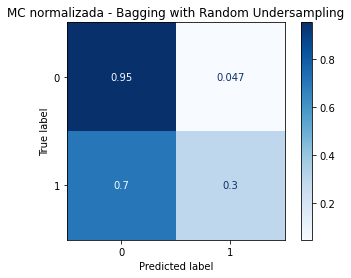

[[0.95885223 0.04114777]
 [0.71252417 0.28747583]]


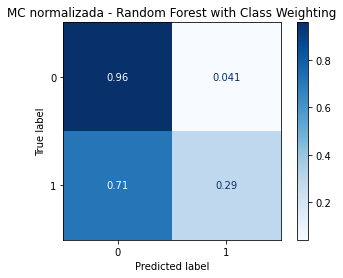

[[0.95915359 0.04084641]
 [0.71493196 0.28506804]]


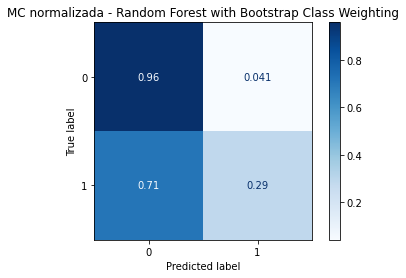

[[0.75498668 0.24501332]
 [0.34387655 0.65612345]]


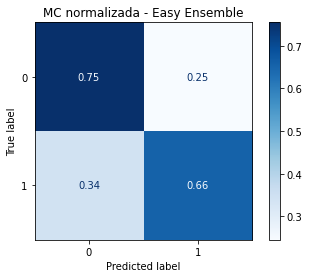

In [ ]:
disp = plot_confusion_matrix(clf4, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada - Bagging with Random Undersampling')
print(disp.confusion_matrix)
plt.show()

disp = plot_confusion_matrix(clf5, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada - Random Forest with Class Weighting')
print(disp.confusion_matrix)
plt.show()

disp = plot_confusion_matrix(clf6, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada - Random Forest with Bootstrap Class Weighting')
print(disp.confusion_matrix)
plt.show()

#disp = plot_confusion_matrix(clf7, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
#disp.ax_.set_title('MC normalizada - Random Forest with Random Undersampling')
#print(disp.confusion_matrix)
#plt.show()

disp = plot_confusion_matrix(clf8, X_test, y_test, display_labels=np.unique(y), cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('MC normalizada - Easy Ensemble')
print(disp.confusion_matrix)
plt.show()

In [63]:

Xtrain, Xtest, ytrain, ytest = train_test_split(X_n, y, test_size=0.3, random_state=0, stratify=y)
Xtest, Xval, ytest, yval = train_test_split(Xtest, ytest, test_size=0.5, random_state=0, stratify=ytest)


In [64]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


In [65]:
model = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('Classifier',RandomForestClassifier(n_estimators=10, max_depth=6, class_weight='balanced_subsample'))
])

In [66]:
st = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
tuned_parameters = [ {'Classifier__n_estimators':[6,8,10], 'Classifier__max_depth':[2,4,6], 'Classifier__max_features':[4,8,12,16]}]
model_tunning = GridSearchCV(estimator=model, param_grid=tuned_parameters, cv=st, scoring='balanced_accuracy',n_jobs=-1,verbose=2)


In [ ]:
model_tunning.fit(Xtrain, ytrain)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min


In [51]:
model_tunning.best_estimator_.steps[1]

('Classifier', RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                        class_weight='balanced_subsample', criterion='gini',
                        max_depth=6, max_features=16, max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=10, n_jobs=None, oob_score=False,
                        random_state=None, verbose=0, warm_start=False))

In [52]:
model_tunning.best_score_

0.7022127668572112

In [53]:
Xtest

,Mes_Id,Uen_Arp_Id,Regional_Arp_Id,Oficina_Arp_Id,Tamano_Empresa_Arp_Id,cant_siniestros,cant_novedades,Sector_Economico_Id,clasificacion_riesgo,cant_dias_cobertura,cant_dias_pago,Nro_afiliados,avg_Valor_Salario,IBC,Numero_Dias_Esperados,Numero_Dias_Reportados,Numero_Total_Coberturas,Valor_Cotizacion_Esperada,Valor_Cotizacion_Reportada,Valor_Ingreso_Base_Liq_Esp,Valor_Ingreso_Base_Liq_Rep,Valor_Saldo,Valor_Tasa_Cotizacion_Esp,Valor_Tasa_Cotizacion_Rep
778425,202002,55,50,53,5343,-0.063065,-0.031348,341,1,0.230655,1.392927,-0.010079,-0.263358,-0.046004,0.492139,0.472952,-0.031390,-0.042160,-0.041971,-0.028399,-0.028513,0.007448,-0.506884,-0.484703
559242,202006,59,60,62,5347,-0.063065,-0.038649,103300,1,1.890614,-0.413064,-0.010132,0.388670,-0.057879,0.492139,0.472952,-0.038671,-0.044519,-0.044141,-0.030538,-0.030379,0.015848,-0.710413,-0.688813
539814,202003,34,40,41,5347,-0.063065,-0.040640,236,1,4.901754,-0.364254,-0.010137,0.116937,-0.068784,0.492139,0.472952,-0.040657,-0.045207,-0.044829,-0.032251,-0.032093,0.015848,-0.710413,-0.688813
610354,202001,59,60,62,5347,-0.063065,-0.039977,341,2,-0.049292,-0.705928,-0.010136,-0.346491,-0.069229,0.492139,0.472952,-0.039995,-0.044905,-0.043650,-0.032321,-0.032163,0.055266,-0.459916,0.246692
843481,202001,35,30,31,5347,-0.063065,-0.029356,341,1,-0.026532,0.099447,-0.010072,-0.340436,-0.046879,-0.770901,-0.656182,-0.029404,-0.036137,-0.036260,-0.029166,-0.029154,-0.006445,0.643147,0.544353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179630,202006,45,20,21,5347,-0.063065,-0.036658,193,1,-0.053844,-0.461875,-0.010124,-0.210796,-0.058491,0.492139,0.472952,-0.036685,-0.044557,-0.044179,-0.030635,-0.030476,0.015848,-0.710413,-0.688813
37255,202004,34,40,41,5345,-0.063065,-0.014753,236,1,-0.845890,5.639448,-0.009660,-0.308143,-0.023540,-2.796961,-3.888487,-0.014179,-0.036226,-0.042299,-0.028783,-0.031916,-0.273967,0.552252,0.800957
571567,202006,59,60,62,5347,-0.063065,-0.036658,341,2,0.990837,-0.315443,-0.010124,0.048628,-0.053142,0.313052,0.304982,-0.036685,-0.042407,-0.042031,-0.029870,-0.029710,0.015848,-0.261607,-0.231691
809165,202001,45,20,21,5347,-0.063065,-0.037985,341,1,0.314109,-0.169011,-0.010130,-0.346491,-0.063991,0.492139,0.472952,-0.038009,-0.044099,-0.043722,-0.031498,-0.031340,0.015848,-0.404251,-0.376978


In [58]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
y_pred = model_tunning.predict(Xtest)
cm = multilabel_confusion_matrix(y_test, y_pred)

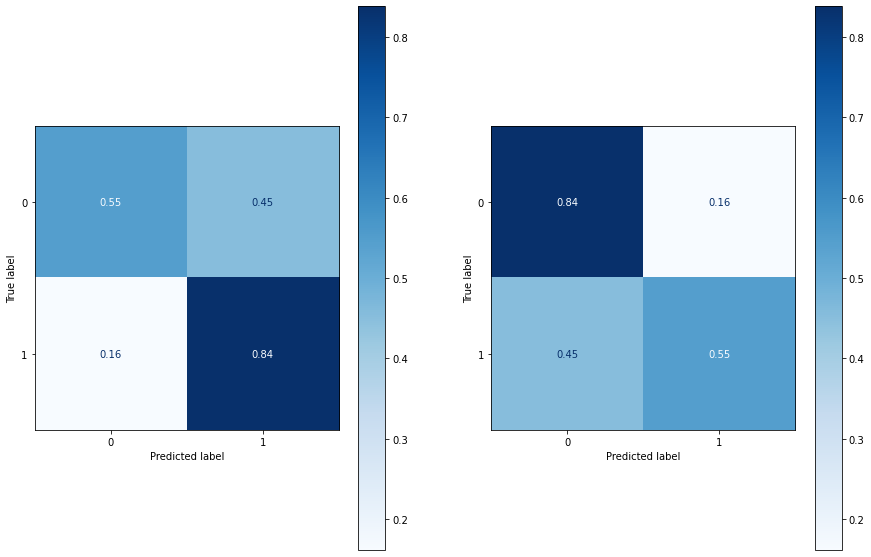

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(15,10))

for i, (k, ax) in enumerate(zip(y, axes.flatten())):
    label = []
    label.append(k)
    label.append(1) 
    disp = ConfusionMatrixDisplay(confusion_matrix=(cm[i].T/np.sum(cm[i],axis=1)).T, display_labels=label)
    disp.plot(include_values=True,cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal',
          values_format=None)
plt.show()

In [ ]:
y_pred_train = model_tunning.predict(Xtrain)
print(f"Global train error = {hamming_loss(ytrain, y_pred_train)}")
print(f"Global test error = {hamming_loss(ytest, ypred)}")